<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/AI-Generated-vs-Human-Text/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load clear Data

In [3]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Vs Human Text/clear_data.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
data.head()

,text,generated,clean_text
0,Cars. Cars have been around since they became ...,0.0,car car around since became famous henry ford ...
1,Transportation is a large necessity in most co...,0.0,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0.0,america love affair vehicle seems cooling say ...
3,How often do you ride in a car? Do you drive a...,0.0,how often ride car do drive one motor vehicle ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,car wonderful thing they perhaps one world gre...


# Model Training

In [6]:
X = data['clean_text']
y = data['generated']

In [7]:
vectorizer = TfidfVectorizer(min_df = 2)
X = vectorizer.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [9]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (389788, 96311)
Test shape : (97447, 96311)


In [10]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

# evaluation

In [11]:
print(f'Test Score : {lr.score(X_test, y_test)}')
print(f'Train Score : {lr.score(X_train, y_train)}')

Test Score : 0.9939146407790902
Train Score : 0.9947586893388201


In [12]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test, target_names=['Generated by Human', 'Generated by AI']))

                    precision    recall  f1-score   support

Generated by Human       1.00      0.99      1.00     61410
   Generated by AI       0.99      1.00      0.99     36037

          accuracy                           0.99     97447
         macro avg       0.99      0.99      0.99     97447
      weighted avg       0.99      0.99      0.99     97447



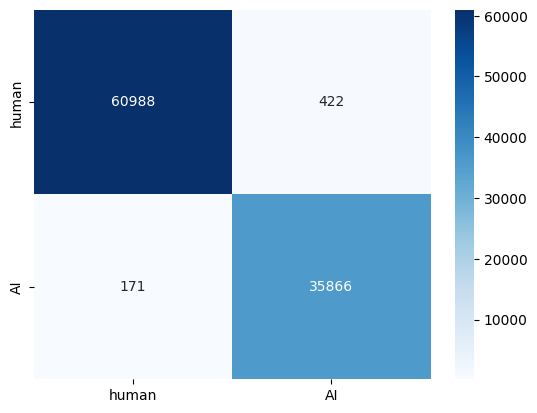

In [13]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['human', 'AI'],
    yticklabels=['human', 'AI']
    )
plt.show()

# Save Model


In [14]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Vs Human Text/LR_model.pickle', 'wb') as f:
    pickle.dump(data,f)
